In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/lichess_db_puzzle.csv')

In [3]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1995,76,94,5553,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1452,73,96,25468,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1276,76,90,498,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,560,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,90,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN


In [4]:
# Get unique themes and their counts
themes = df['Themes'].str.split()
themes_flat = [theme for sublist in themes for theme in sublist]
unique_themes = pd.Series(themes_flat).value_counts()

print(unique_themes)


short                2109406
middlegame           1809811
endgame              1740266
crushing             1649707
advantage            1131924
mate                  937572
long                  934929
fork                  541437
mateIn2               440466
oneMove               417437
mateIn1               370672
veryLong              299718
kingsideAttack        294796
master                269971
sacrifice             267337
pin                   240717
defensiveMove         229189
opening               212396
discoveredAttack      212196
advancedPawn          207980
rookEndgame           178401
hangingPiece          162592
deflection            159238
quietMove             148303
attraction            128975
backRankMate          116894
pawnEndgame           108413
mateIn3               107604
exposedKing           102374
skewer                 82910
promotion              78435
trappedPiece           54872
intermezzo             53761
clearance              51347
queensideAttac

In [5]:
theme_counts = unique_themes.sum()
print(theme_counts)


16290133


In [6]:
covered_themes = ["advancedPawn", "advantage", "attackingF2F7", "bishopEndgame", "castling", "crushing", "doubleCheck", "enPassant", "endgame", "equality","hangingPiece",
"knightEndgame",
"long",
"master",
"masterVsMaster",
"mate",
"mateIn1",
"mateIn2",
"mateIn3",
"mateIn4",
"mateIn5",
"middlegame",
"oneMove",
"opening",
"pawnEndgame",
"promotion",
"queenEndgame",
"queenRookEndgame",
"rookEndgame",
"short",
"superGM",
"underPromotion",
"veryLong"]

In [7]:
covered_occurrences = unique_themes[covered_themes].sum()
covered_percentage = covered_occurrences / theme_counts * 100
print(covered_percentage)


82.48170840594119


In [8]:
puzzle_count = df.shape[0]

covered_themes_count = df['Themes'].str.split().apply(lambda x: any(tag in x for tag in covered_themes)).sum()
percentage = covered_themes_count / puzzle_count * 100
print(percentage)

100.0


In [9]:
tbd = ["fork", "kingsideAttack", "sacrifice", "pin", "defensiveMove"]
covered_occurrences = unique_themes[tbd].sum()
covered_percentage = covered_occurrences / theme_counts * 100
print(covered_percentage)


9.659073992827437


In [10]:
df["OpeningTags"].value_counts()

Italian_Game Italian_Game_Two_Knights_Defense                      12444
Caro-Kann_Defense Caro-Kann_Defense_Other_variations               12119
Indian_Defense Indian_Defense_Other_variations                     11956
Queens_Pawn_Game Queens_Pawn_Game_Accelerated_London_System        11127
Philidor_Defense Philidor_Defense_Other_variations                 10988
                                                                   ...  
Dutch_Defense Dutch_Defense_Hevendehl_Gambit                           1
Kings_Gambit_Accepted Kings_Gambit_Accepted_Quaade_Gambit              1
English_Defense English_Defense_Hartlaub_Gambit_Declined               1
Richter-Veresov_Attack Richter-Veresov_Attack_Veresov_Variation        1
Scotch_Game Scotch_Game_Hanneken_Variation                             1
Name: OpeningTags, Length: 1348, dtype: int64

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
df['OpeningTags'] = df['OpeningTags'].str.split(' ').str[0]

In [13]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1995,76,94,5553,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1452,73,96,25468,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1276,76,90,498,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,560,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,90,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN


In [14]:
df.describe()

,Rating,RatingDeviation,Popularity,NbPlays
count,3.764379e+06,3.764379e+06,3.764379e+06,3.764379e+06
mean,1.520251e+03,9.051031e+01,8.343254e+01,1.641598e+03
std,5.410730e+02,4.412472e+01,2.161519e+01,4.384180e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.090000e+03,7.500000e+01,8.200000e+01,9.200000e+01
50%,1.484000e+03,7.800000e+01,8.900000e+01,3.660000e+02
75%,1.920000e+03,8.800000e+01,9.300000e+01,1.304000e+03
max,3.330000e+03,5.000000e+02,1.010000e+02,1.007612e+06


In [15]:
filtered_puzzles = df[(df['Popularity'] >= 80) & (df['NbPlays'] > 1000)].copy()

In [16]:
filtered_puzzles.shape

(1125672, 10)

In [17]:
# Get unique themes
themes = filtered_puzzles['Themes'].str.split()
themes_flat = [theme for sublist in themes for theme in sublist]

unique_themes = pd.Series(themes_flat).value_counts()

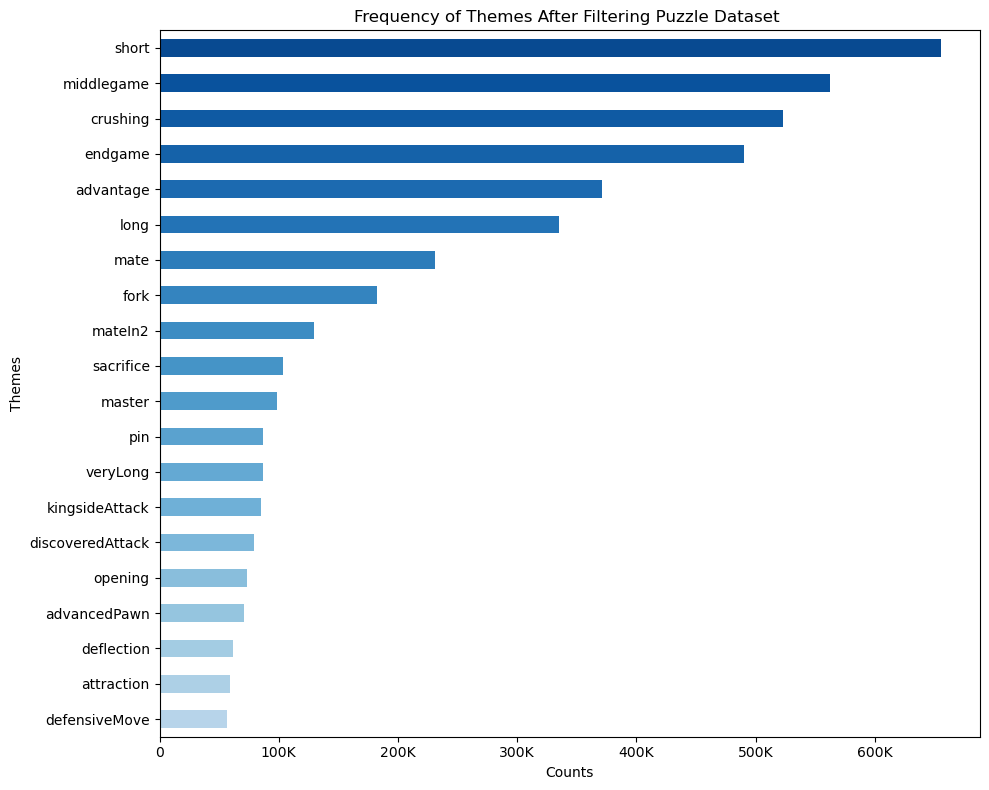

In [18]:
from matplotlib.ticker import FuncFormatter


def millions_formatter(x, pos):
    return f'{int(x/1_000_000)}M' if x >= 1_000_000 else f'{int(x/1_000)}K' if x >= 1_000 else int(x)

filtered_themes = unique_themes[unique_themes > 50_000]
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(filtered_themes)))

plt.figure(figsize=(10, 8))
ax = filtered_themes.sort_values().plot(kind='barh', color=colors)
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))   
plt.title('Frequency of Themes After Filtering Puzzle Dataset ')
plt.xlabel('Counts')
plt.ylabel('Themes')
plt.tight_layout()  
plt.show()

In [19]:
covered_themes = ["advancedPawn", "advantage", "attackingF2F7", "bishopEndgame", "castling", "crushing", "doubleCheck", "enPassant", "endgame", "hangingPiece",
"knightEndgame",
"long",
"master",
"masterVsMaster",
"mate",
"mateIn1",
"mateIn2",
"mateIn3",
"mateIn4",
"mateIn5",
"middlegame",
"oneMove",
"opening",
"pawnEndgame",
"promotion",
"queenEndgame",
"queenRookEndgame",
"rookEndgame",
"short",
"superGM",
"underPromotion",
"veryLong", "pin"]

In [20]:
theme_counts = unique_themes.sum()

covered_occurrences = unique_themes[covered_themes].sum()
covered_percentage = covered_occurrences / theme_counts * 100
print(covered_percentage)


82.44977200312668


In [21]:
puzzle_count = filtered_puzzles.shape[0]

covered_themes_count = filtered_puzzles['Themes'].str.split().apply(lambda x: any(tag in x for tag in covered_themes)).sum()
percentage = covered_themes_count / puzzle_count * 100
print(percentage)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize


similarity_scores = cosine_similarity(puzzle_matrix, drapi)

# Recommend the top X puzzles with the highest similarity scores
X = 5000  
recommended_puzzle_indices = np.argsort(similarity_scores.flatten())[-X:][::-1]  # Get top X indices

# Output the indices of the recommended
print("Recommended Puzzle Indices:", recommended_puzzle_indices[:15])

Recommended Puzzle Indices: [535645 480776 224045 408917 515585 346236 174577 173695 159435 483882
 192891 302978 266820  11552 390221]


In [ ]:
# Retrieve the recommended puzzles from the DataFrame
recommended_puzzles = filtered_puzzle_df.iloc[recommended_puzzle_indices[:15]]

# Display the recommended puzzles
print(recommended_puzzles)

        PuzzleId                                                FEN  \
3735269    zWInm  6k1/pp2qNp1/1b2p2p/4P3/1n1NP3/2R2Q1P/PP4PK/4r3...   
3350008    tAY8c  r3q1k1/1Q1bbp2/6pp/p4N2/4P3/7P/4BPP1/3R2K1 b -...   
1558143    PfjXV  3r3r/1pN1kpp1/7p/2b2b2/p1Q1pB2/P7/BPP2qPP/R6K ...   
2849111    kvUBS  1k1r3r/1p3Qp1/p3p2q/1N4p1/3bP3/P6P/1P4P1/2R2R1...   
3593328    xBMq6  2b2rk1/1r4b1/p1pR1p2/4p1Bq/4P1nN/2NQ3P/PPP3P1/...   
2411181    diTnE  4r1k1/pQ3p1p/3r2p1/4n1q1/2Bp2P1/1P5P/P4PK1/4R2...   
1212459    JyE0v  r1b2rk1/pp1n1p1p/4p1p1/2b5/3N3Q/2qBB3/P1P3PP/4...   
1206868    JsZ6Q  3rr1k1/pbq2N1p/1pn3p1/2pp4/8/3PB1PP/PbP3BK/R3Q...   
1107260    IEV6T  r4rk1/1p3ppp/p1b5/2npqN2/3N2Q1/8/PPP3PP/R4R1K ...   
3371545    tWMJ6  r2r2k1/pQ3pp1/5q1p/5b2/5b2/2P2N1P/PP1N1PP1/R4R...   
1339966    M4xIr  1r2r1k1/5p2/2N3qp/2pQp3/P2p2b1/1P1P1p2/2P2PP1/...   
2109490    Ykd5X  r3qr2/1ppb2kn/3p4/p1nP1p2/2P1PR1p/2N5/PPBQ2PP/...   
1856243    Ua99f  2r4r/pp3kp1/4ppp1/2pn1q2/Q7/2P4R/PP1B1PPP/K3R3...   
80661 

In [ ]:
def diversify_recommendations(puzzles_df, recommended_indices, max_unique=5):
    recommended_puzzles = puzzles_df.iloc[recommended_indices]
    diverse_selection = []

    for idx, row in recommended_puzzles.iterrows():
        current_themes = set(row['Themes'].split())
        is_too_similar = False

        # Check current puzzle themes against all already selected puzzles' themes
        for selected in diverse_selection:
            selected_themes = set(selected['Themes'].split())
            if len(current_themes & selected_themes) >= 3:  # If three or more themes overlap
                is_too_similar = True
                break

        # Add current puzzle if it is not too similar to any puzzle in the diverse selection
        if not is_too_similar:
            diverse_selection.append(row)
            if len(diverse_selection) >= max_unique:
                break

    return pd.DataFrame(diverse_selection)

# Call this function with the top recommended indices
diversified_recommendations = diversify_recommendations(filtered_puzzles, recommended_puzzle_indices, max_unique=10)

In [ ]:
diversified_recommendations = diversify_recommendations(filtered_puzzle_df, recommended_puzzle_indices)
print(diversified_recommendations)

        PuzzleId                                                FEN  \
3735269    zWInm  6k1/pp2qNp1/1b2p2p/4P3/1n1NP3/2R2Q1P/PP4PK/4r3...   
3007901    nXXqB  7k/pp1b2bp/6p1/5p2/1B6/1B4P1/PP1rrP1P/R2R2K1 b...   
2880939    lRz8y  r4rk1/1p2qp2/p2p2p1/2p1b3/4P1BP/2PP1R2/PP3Q2/5...   
1984295    Wgtmo  1r6/2nnpkbQ/2q3p1/p1ppP1P1/1p1P3N/2P1P3/PP1B3P...   
3570983    woVKj  rnb1k3/pp4p1/2pbp3/3p1p2/2PP3q/1NN1P1p1/PPQ2P1...   

                                                     Moves  Rating  \
3735269  b6d4 c3c8 g8h7 c8h8 h7g6 f3g4 g6f7 g4h5 g7g6 h...    2693   
3007901                                d2d4 d1d4 g7d4 a1d1    1954   
2880939                                g8g7 d3d4 c5d4 c3d4    1805   
1984295                                b8h8 a1f1 f7e8 h7g7    1736   
3570983                                f2g3 d6g3 e1d1 h2c2    1588   

         RatingDeviation  Popularity  NbPlays  \
3735269               84          93     2209   
3007901               74          96     2512   
28809

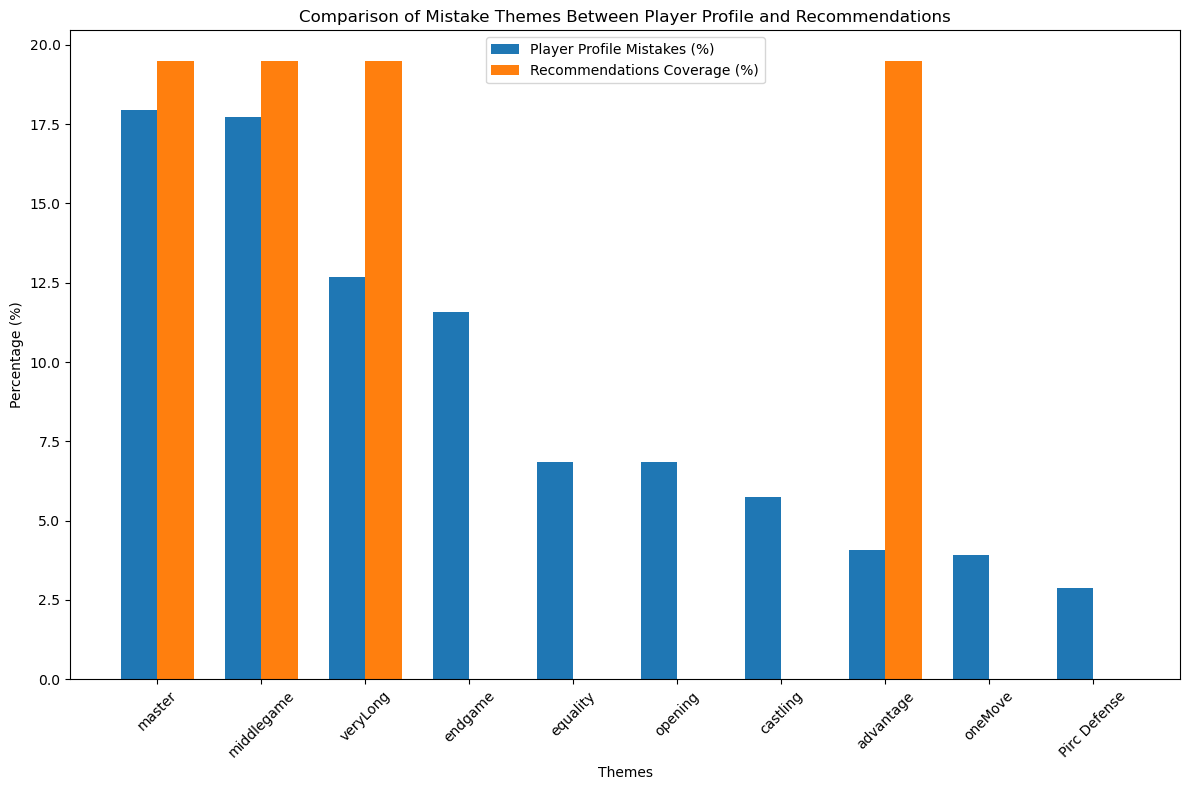

In [ ]:
player_profile = pd.read_csv('player_analysis/MeikeSchlecker-2229.csv')

# Calculate the total number of mistakes across all themes
total_mistakes = player_profile['mistake_count'].sum()

# Calculate the percentage of mistakes for each theme
player_profile['mistake_percentage'] = (player_profile['mistake_count'] / total_mistakes) * 100

# Extract themes and calculate 
recommended_theme_count = {}
for themes in recommended_puzzles['Themes']:
    for theme in themes.split():
        if theme not in recommended_theme_count:
            recommended_theme_count[theme] = 0
        recommended_theme_count[theme] += 1

# Calculate the total count 
total_recommended_count = sum(recommended_theme_count.values())
recommended_coverage = {k: (v / total_recommended_count) * 100 for k, v in recommended_theme_count.items()}

# Merge the profiles
profile_vs_recommendation = player_profile[['Themes', 'mistake_percentage', 'mistake_count']].copy()
profile_vs_recommendation['recommended_percentage'] = profile_vs_recommendation['Themes'].map(recommended_coverage).fillna(0)

# Top 10 themes
top_10_themes = profile_vs_recommendation.sort_values(by='mistake_count', ascending=False).head(10)

# Plot 
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(top_10_themes))

plt.bar(index, top_10_themes['mistake_percentage'], bar_width, label='Player Profile Mistakes (%)')
plt.bar([i + bar_width for i in index], top_10_themes['recommended_percentage'], bar_width, label='Recommendations Coverage (%)')

plt.xlabel('Themes')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Mistake Themes Between Player Profile and Recommendations')
plt.xticks([i + bar_width / 2 for i in index], top_10_themes['Themes'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Final Code 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import os
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict 
import re



def create_puzzle_profile(df, vocabulary):
    """
    Create a puzzle profile matrix from a DataFrame using a predefined vocabulary.
    
    Args:
        df (pd.DataFrame): DataFrame containing puzzle data.
        vocabulary (list): A list of terms to include in the vectorization of text.
    
    Returns:
        np.ndarray: A matrix of normalized puzzle profile data.
        pd.DataFrame: The filtered DataFrame.
    """
    try:
        # Filter df
        df_filtered = df[(df['NbPlays'] > 1000) & (df['Popularity'] >= 80)].copy()
        df_filtered.drop(['PuzzleId', 'FEN', 'Moves', 'RatingDeviation', 'Popularity', 'NbPlays', 'GameUrl'], axis=1, inplace=True)

        # Process OpeningTags 
        df_filtered['OpeningTags'] = df_filtered['OpeningTags'].apply(lambda x: x.split()[0].replace('_', ' ') if isinstance(x, str) else '')

        # Create a combined column for text data
        df_filtered['combined_text'] = df_filtered['Themes'].fillna('') + ' ' + df_filtered['OpeningTags'].fillna('')

        # Apply CountVectorizer 
        vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=False)
        text_features = vectorizer.fit_transform(df_filtered['combined_text'])

        # Normalize numerical 
        scaler = MinMaxScaler()
        df_filtered['Rating'] = scaler.fit_transform(df_filtered[['Rating']])

        # Combine all features 
        features_matrix = np.hstack((text_features.toarray(), df_filtered[['Rating']].values))
        
        print(f"Generated puzzle profile matrix: Shape - {features_matrix.shape}")
        return features_matrix, df_filtered

    except Exception as e:
        print(f"Error processing DataFrame: {e}")
        return None, df_filtered


def process_player_profiles(directory, vocabulary):
    """
    Processes all player profile CSV files in a directory, normalizes the data, and combines them into a single matrix.
    Each row corresponds to a player profile derived from a CSV file, with the last element being the normalized rating.
    
    Args:
        directory (str): Path to the directory containing player profile CSV files.
        vocabulary (list): A list of all possible themes in the expected order.
    
    Returns:
        np.ndarray: A combined matrix of all player profiles, with each row corresponding to a player profile including the normalized rating.
    """
    all_profiles = []
    ratings = []



    # Scaler for normalizing theme counts
    theme_scaler = MinMaxScaler()
    # Separate scaler for ratings
    rating_scaler = MinMaxScaler()

    # Multiply theme matrix by as per the weighting requirement
    excluded_numbers = {1,8,9,21,32}
    #excluded_numbers = {}
    indices_to_multiply = [num for num in range(63) if num in excluded_numbers]
    #indices_to_multiply = [num for num in range(63)]
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path, header=None, names=['Theme', 'Count'])

            # Extract rating from filename
            rating = float(filename.split('-')[-1].replace('.csv', ''))

            # Convert df into a series where index is themes and value is counts
            profile_series = df.set_index('Theme')['Count']
            
            # Reindex the series to match the vocabulary, filling missing values with 0
            profile_vector = profile_series.reindex(vocabulary).fillna(0).tolist()
            profile_vector = [float(value) for value in profile_vector]
            
            # Adding weights 
            for index in indices_to_multiply:
                profile_vector[index] *= 4             
                       
           
            #Store the profile vector and rating separately
            all_profiles.append(profile_vector)
            ratings.append(rating)

         

    # Convert to numpy array
    themes_matrix = np.array(all_profiles, dtype=float)
    ratings_matrix = np.array(ratings).reshape(-1, 1) 

              
    # Normalize the themes and ratings separately
    normalized_themes = theme_scaler.fit_transform(themes_matrix)
    normalized_ratings = rating_scaler.fit_transform(ratings_matrix)


    # Merge normalized themes and ratings back into one matrix
    normalized_matrix = np.hstack([normalized_themes, normalized_ratings])
    
    print(f"Normalized matrix shape: {normalized_matrix.shape}") 
    return normalized_matrix



In [2]:
vocabulary = ['advancedPawn', 'advantage', 'attackingF2F7', 'bishopEndgame', 'castling', 'crushing', 
                      'doubleCheck', 'enPassant', 'endgame', 'equality', 'hangingPiece', 'knightEndgame', 'long', 
                      'master', 'masterVsMaster', 'mate', 'mateIn1', 'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 
                      'middlegame', 'oneMove', 'opening', 'pawnEndgame', 'promotion', 'queenEndgame', 
                      'queenRookEndgame', 'rookEndgame', 'short', 'superGM', 'underPromotion', 'veryLong','Nimzowitsch-Larsen Attack', 'Bird System', 'Réti Opening', 'English Opening', "Queen's Pawn", 
                        'Rat Defense', 'Old Benoni Defense', 'Indian Defense', 'Dutch Defense', "King's Pawn", 
                        'Scandinavian Defense', 'Alekhine Defense', 'Robatsch Defense', 'Pirc Defense', 'Caro-Kann Defense', 
                        'Sicilian Defense', 'French Defense', 'Centre Gambit Accepted', "King's Bishop's Opening", 
                        'Vienna Game', "King's Gambit", "King's Knight's Opening", "Queen's Gambit", 
                        'Neo-Grünfeld Defense', 'Grünfeld Defense', 'East Indian Defense', 'Catalan Opening', 
                        'Anti-Nimzo-Indian', 'Nimzo-Indian Defense', "King's Indian Defense"]

In [3]:
puzzles_df = pd.read_csv('data\lichess_db_puzzle.csv')
puzzle_matrix, filtered_puzzles = create_puzzle_profile(puzzles_df, vocabulary)

directory_path = 'player_analysis'  
player_profiles_matrix = process_player_profiles(directory_path, vocabulary)

Generated puzzle profile matrix: Shape - (1125672, 64)
Normalized matrix shape: (500, 64)


In [4]:

def calculate_distance_and_recommendations(player_profiles, puzzle_matrix, top_n=5):
    """
    Calculates cosine similarity, Euclidean distance, and Manhattan distance between each player profile and all puzzles,
    and provides recommendations based on these metrics.
    
    Args:
        player_profiles (np.ndarray): A matrix of player profiles.
        puzzle_matrix (np.ndarray): A matrix of puzzle profiles.
        top_n (int): Number of top recommendations to return for each metric.
    
    Returns:
        dict: A dictionary containing three matrices for cosine similarity, Euclidean distance, Manhattan distance,
              and lists of top_n recommended puzzle indices for each metric.
    """
    # Calculate cosine similarity
    cosine_sim = cosine_similarity(player_profiles, puzzle_matrix)
    
    # Calculate Euclidean distance
    euclidean_dist = euclidean_distances(player_profiles, puzzle_matrix)
    
    # Calculate Manhattan distance
    manhattan_dist = manhattan_distances(player_profiles, puzzle_matrix)
    
    # Get top N recommendations based on highest cosine similarity
    top_cosine_indices = np.argsort(-cosine_sim, axis=1)[:, :top_n]
    
    # Get top N recommendations based on lowest Euclidean distance
    top_euclidean_indices = np.argsort(euclidean_dist, axis=1)[:, :top_n]
    
    # Get top N recommendations based on lowest Manhattan distance
    top_manhattan_indices = np.argsort(manhattan_dist, axis=1)[:, :top_n]
    
    # Store results in a dictionary
    distances_and_recommendations = {
        'cosine_similarity': cosine_sim,
        'euclidean_distance': euclidean_dist,
        'manhattan_distance': manhattan_dist,
        'cosine_recommendations': top_cosine_indices,
        'euclidean_recommendations': top_euclidean_indices,
        'manhattan_recommendations': top_manhattan_indices
    }

    return distances_and_recommendations

# Usage example assuming player_profiles and puzzle_matrix are already defined
results = calculate_distance_and_recommendations(player_profiles_matrix, puzzle_matrix, top_n=20)


In [40]:
## NOT USED IN THE END
def plot_coverage_vs_mistakes_with_diagnostics(profiles_matrix, recommendation_indices_list, puzzle_profiles, vocabulary, aggregate=False, top_n=10):
    all_profile_mistake_counts = defaultdict(int)
    all_recommended_theme_counts = defaultdict(int)
    individual_results = []

    for profile_idx, recommendation_indices in enumerate(recommendation_indices_list):
        profile_mistake_counts = profiles_matrix[profile_idx] 
        
        # Fetch recommended puzzle data using indices
        recommended_puzzles = puzzle_profiles.iloc[recommendation_indices]

        # Check and handle the number of columns in recommended_puzzles
        if recommended_puzzles.shape[1] != len(vocabulary):
            raise ValueError("The number of columns in recommended puzzles does not match the vocabulary size.")

        recommended_theme_counts = recommended_puzzles.sum(axis=0).values  s

        # Ensure counts match the vocabulary size
        if len(recommended_theme_counts) != len(vocabulary):
            raise ValueError("The size of the aggregated recommended theme counts does not match the vocabulary size.")

        profile_vs_recommendation = pd.DataFrame({
            'Themes': vocabulary,
            'mistake_count': profile_mistake_counts,  # Directly use the row values
            'recommended_count': recommended_theme_counts
        })

        individual_results.append(profile_vs_recommendation)

        if aggregate:
            for theme, mistake_count, recommended_count in profile_vs_recommendation.itertuples(index=False):
                all_profile_mistake_counts[theme] += mistake_count
                all_recommended_theme_counts[theme] += recommended_count

    if aggregate:
        # Aggregate and plot results
        plot_aggregated_results(all_profile_mistake_counts, all_recommended_theme_counts, vocabulary, top_n)
    else:
        # Plot individual results
        for profile_result in individual_results:
            plot_individual_results(profile_result, top_n)

def plot_aggregated_results(mistake_counts, recommendation_counts, vocabulary, top_n):
    aggregated_results = pd.DataFrame({
        'Themes': vocabulary,
        'mistake_count': [mistake_counts[theme] for theme in vocabulary],
        'recommended_count': [recommendation_counts[theme] for theme in vocabulary]
    }).nlargest(top_n, 'mistake_count')

    plot_results(aggregated_results, 'Aggregated Comparison of Mistake Themes and Recommendations Coverage')

def plot_individual_results(data, top_n):
    top_themes = data.nlargest(top_n, 'mistake_count')
    plot_results(top_themes, 'Comparison of Mistake Themes and Recommendations Coverage for an Individual Player')

def plot_results(data, title):
    plt.figure(figsize=(12, 8))
    index = np.arange(len(data))
    bar_width = 0.35

    plt.bar(index, data['mistake_count'], bar_width, label='Mistakes Count')
    plt.bar(index + bar_width, data['recommended_count'], bar_width, label='Recommendations Count')

    plt.xlabel('Themes')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index + bar_width / 2, data['Themes'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


SyntaxError: invalid syntax (1184919358.py, line 16)

In [6]:
vocabulary = ['advancedPawn', 'advantage', 'attackingF2F7', 'bishopEndgame', 'castling', 'crushing', 
                      'doubleCheck', 'enPassant', 'endgame', 'equality', 'hangingPiece', 'knightEndgame', 'long', 
                      'master', 'masterVsMaster', 'mate', 'mateIn1', 'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 
                      'middlegame', 'oneMove', 'opening', 'pawnEndgame', 'promotion', 'queenEndgame', 
                      'queenRookEndgame', 'rookEndgame', 'short', 'superGM', 'underPromotion', 'veryLong','Nimzowitsch-Larsen Attack', 'Bird System', 'Réti Opening', 'English Opening', "Queen's Pawn", 
                        'Rat Defense', 'Old Benoni Defense', 'Indian Defense', 'Dutch Defense', "King's Pawn", 
                        'Scandinavian Defense', 'Alekhine Defense', 'Robatsch Defense', 'Pirc Defense', 'Caro-Kann Defense', 
                        'Sicilian Defense', 'French Defense', 'Centre Gambit Accepted', "King's Bishop's Opening", 
                        'Vienna Game', "King's Gambit", "King's Knight's Opening", "Queen's Gambit", 
                        'Neo-Grünfeld Defense', 'Grünfeld Defense', 'East Indian Defense', 'Catalan Opening', 
                        'Anti-Nimzo-Indian', 'Nimzo-Indian Defense', "King's Indian Defense", "Rating"]

In [7]:
def compare_theme_frequencies(player_profiles, results, features_matrix, vocab_list):
    """
    Compares the frequency of themes in player profiles with those in recommended puzzles using indices
    to access specific rows in a numpy array of features matrix.
    
    Args:
        player_profiles (np.ndarray): Array containing player profile features.
        results (dict): Dictionary containing similarity scores and top recommendation indices for each metric.
        features_matrix (np.ndarray): Array of all puzzles with features as rows.
        vocab_list (list): List of all possible themes.
    """
    # Sum player themes and convert to percentage
    player_profiles_df = pd.DataFrame(player_profiles, columns=vocab_list)
    player_theme_counts = player_profiles_df.sum()
    player_theme_percentages = (player_theme_counts / player_theme_counts.sum()) * 100

    for metric in ['cosine', 'euclidean', 'manhattan']:
        recommendation_indices = results[f'{metric}_recommendations']
        
        # Handling recommendations and aggregating their themes
        all_recommended_themes = np.zeros(len(vocab_list))
        for indices in recommendation_indices:
            recommended_puzzles = features_matrix[indices, :]  
            recommended_themes = np.sum(recommended_puzzles, axis=0)  #
            all_recommended_themes += recommended_themes

        # Convert sums to percentages
        total_recommended = np.sum(all_recommended_themes)
        if total_recommended > 0:
            puzzle_theme_percentages = (all_recommended_themes / total_recommended) * 100
        else:
            puzzle_theme_percentages = np.zeros(len(vocab_list))

        # Create df for plotting
        theme_comparison = pd.DataFrame({
            'Player Themes (%)': player_theme_percentages,
            'Puzzle Themes (%)': puzzle_theme_percentages
        }, index=vocab_list)

        theme_comparison.drop('Rating', inplace=True)
        
        # Plot the data
        theme_comparison_sorted = theme_comparison.sort_values('Player Themes (%)', ascending=False). head(20)
        theme_comparison_sorted.plot(kind='barh', figsize=(14, 7))
        plt.title(f'Comparison of Theme Frequencies in Player Profiles vs. {metric}')
        plt.xlabel('Themes')
        plt.ylabel('Percentage')
        plt.gca().invert_yaxis()
        plt.show()



In [8]:
player_profiles_og = np.load('normalized_matrix_og.npy')

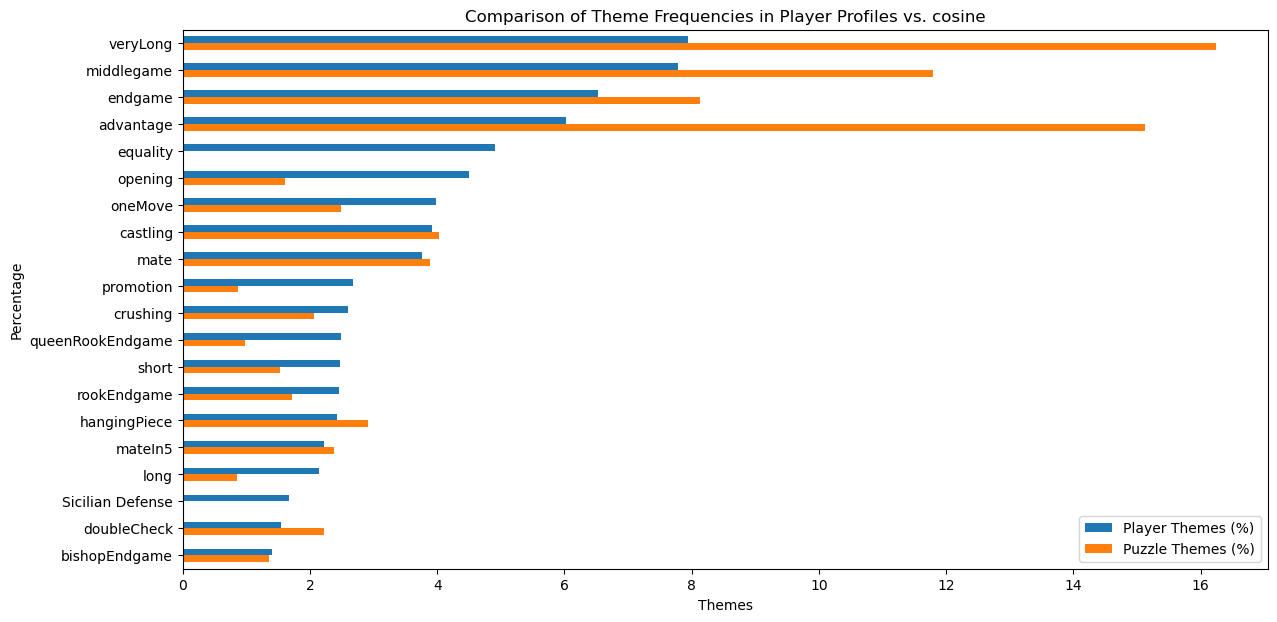

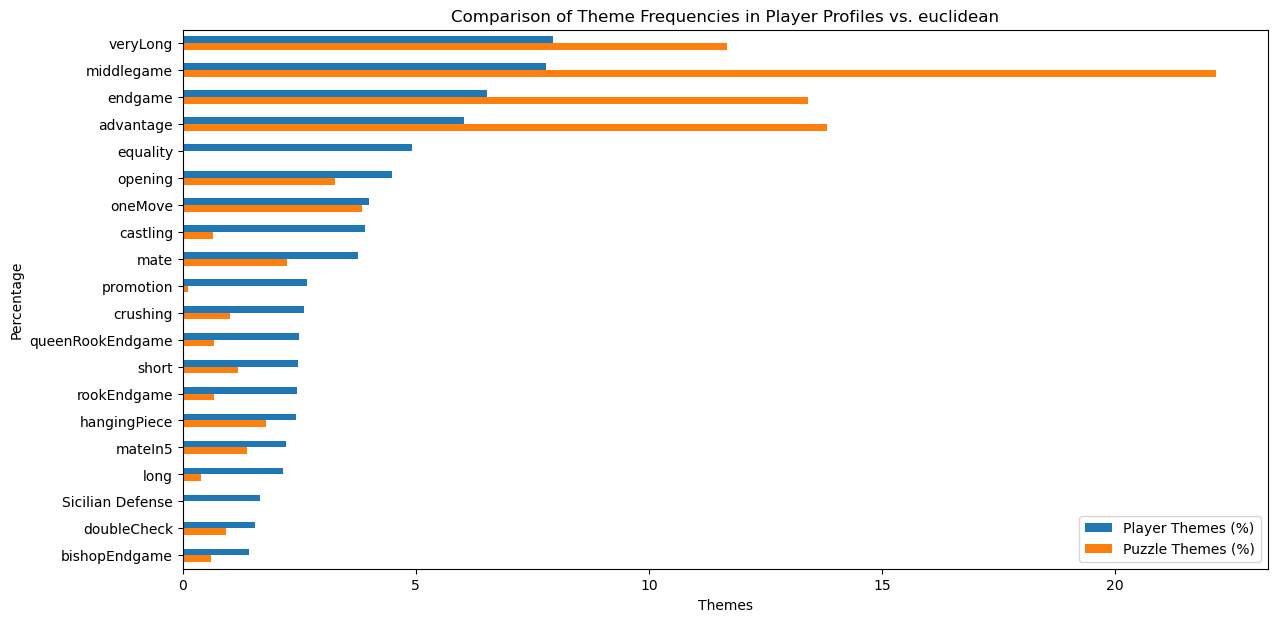

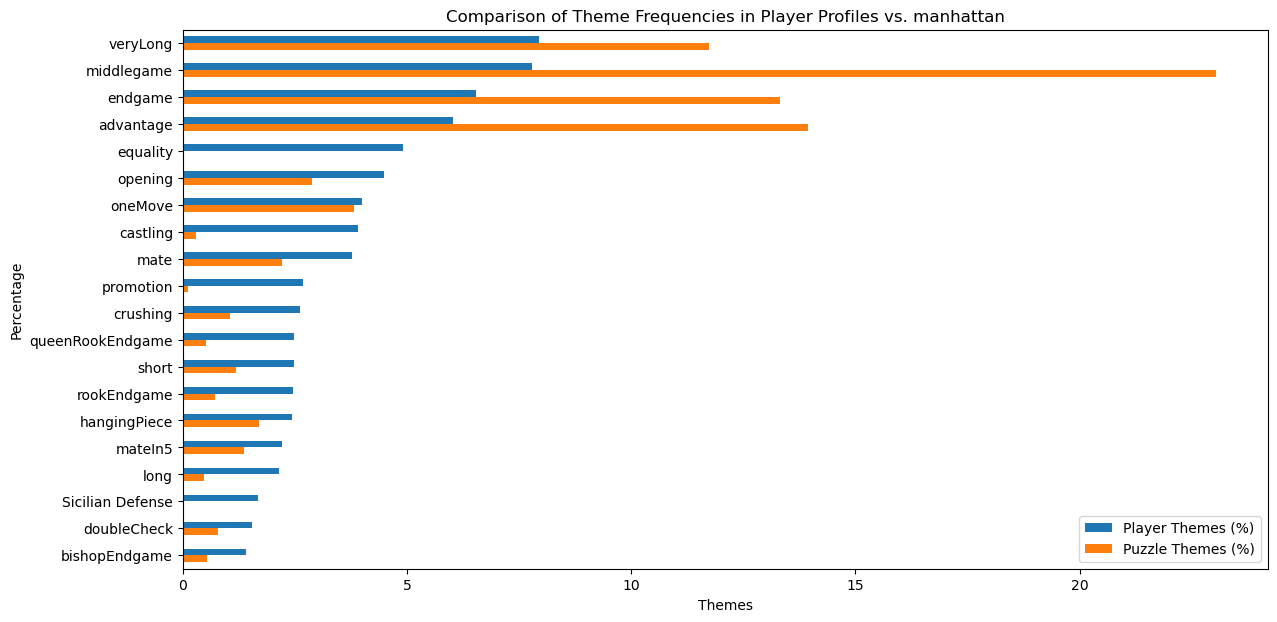

In [9]:
compare_theme_frequencies(player_profiles_og, results,puzzle_matrix,vocabulary)

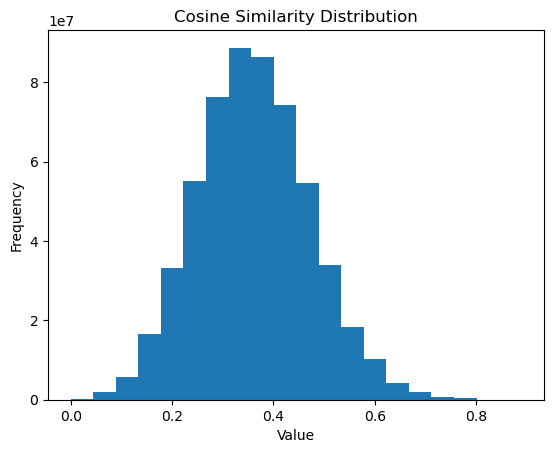

In [10]:
# PLOTS NOT USED
flat_cosine_similarity = np.concatenate(results['cosine_similarity'])

# Now, plot the histogram
plt.hist(flat_cosine_similarity, bins=20)
plt.title('Cosine Similarity Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


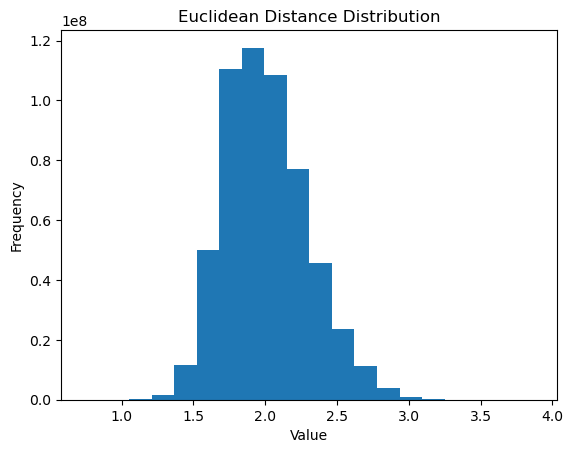

In [11]:

flat_cosine_similarity = np.concatenate(results['euclidean_distance'])

# Plot
plt.hist(flat_cosine_similarity, bins=20)
plt.title('Euclidean Distance Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


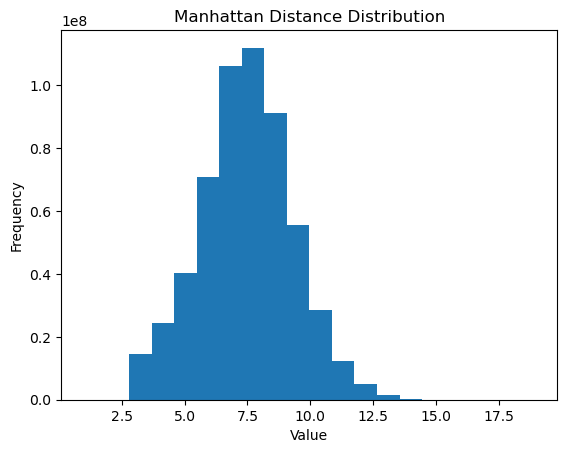

In [12]:
flat_cosine_similarity = np.concatenate(results['manhattan_distance'])

# Plot
plt.hist(flat_cosine_similarity, bins=20)
plt.title('Manhattan Distance Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


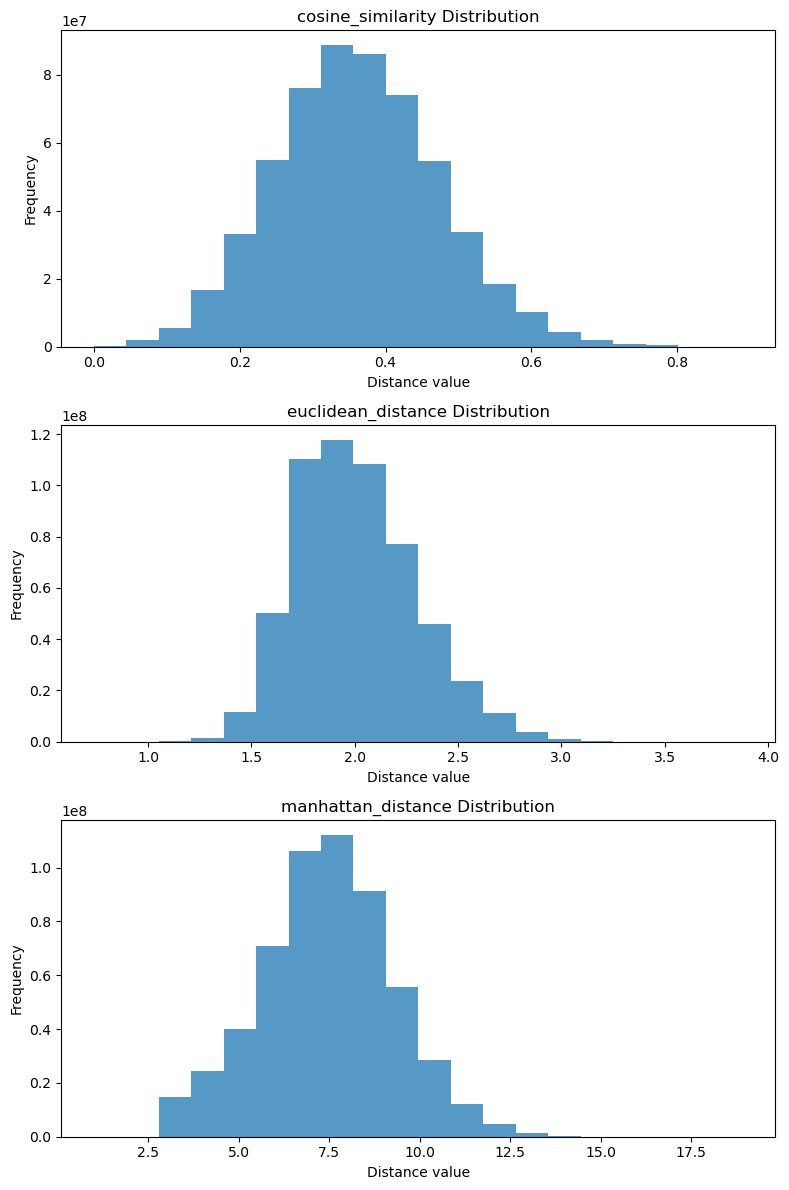

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  

for ax, key in zip(axes, results.keys()):
    flat_values = np.concatenate(results[key])
    ax.hist(flat_values, bins=20, alpha=0.75)
    ax.set_title(f'{key} Distribution')
    ax.set_xlabel('Distance value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


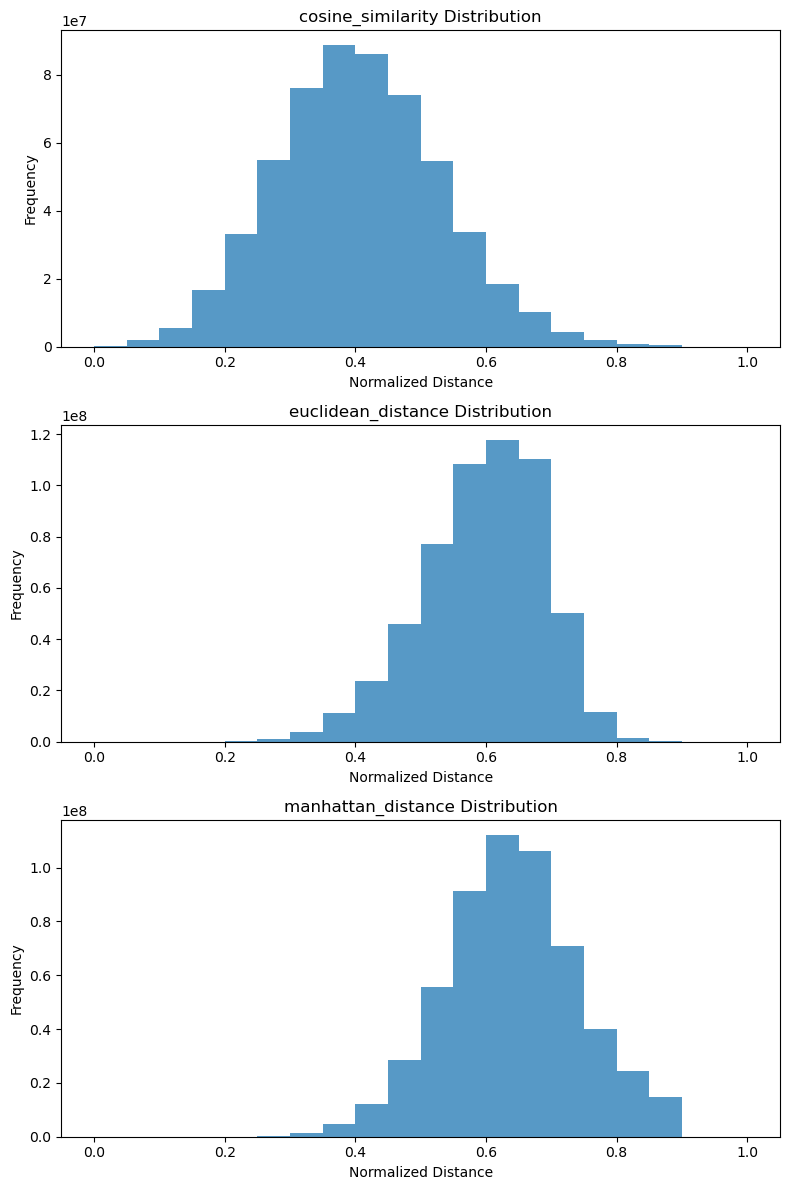

In [14]:

selected_keys = list(results.keys())[:3]
for key in selected_keys:
    concatenated = np.concatenate(results[key])
    normalized = (concatenated - np.min(concatenated)) / (np.max(concatenated) - np.min(concatenated))
    
    if key in ['euclidean_distance', 'manhattan_distance']:
        normalized = 1 - normalized
    
    
    results[key] = normalized

# Plot
fig, axes = plt.subplots(len(selected_keys), 1, figsize=(8, 12), sharex=False)
if len(selected_keys) == 1:
    axes = [axes]  

for ax, key in zip(axes, selected_keys):
    ax.hist(results[key], bins=20, alpha=0.75)
    ax.set_title(f'{key} Distribution')
    ax.set_xlabel('Normalized Distance')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
len(results["cosine_similarity"])

562836000

In [ ]:
235265448/200

1176327.24

## BASELINE RECOMMENDATIONS

In [ ]:
results['cosine_recommendations'][15]

array([ 587271,   47453,   41408,  213390,  769764,  838084,  488649,
         10428,  701055,  232738,  392119,  598404,  755358,  198403,
        217461,  501895, 1114006,   55841,  847702,  453604], dtype=int64)

In [ ]:
results['euclidean_recommendations'][15]

array([ 788534, 1032927,  145405,  795867, 1030807,  127195,  480960,
         89578,  219543, 1095138,  607974,  278978,  539435,  728118,
         44454,  538359,  279426,  707403,  686447,  588904], dtype=int64)

In [ ]:
results['manhattan_recommendations'][15]

array([ 788534, 1032927,  145405, 1030807,  795867,  127195,  480960,
         89578,  219543, 1095138,  607974,  278978,  539435,  728118,
         44454,  538359,  279426,  707403,  686447,  588904], dtype=int64)

## 2nd CASE RECOMENDATIONS

In [ ]:
results['cosine_recommendations'][15]

array([ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,
        208360,  131522,  983144,  683912,   97618,  445600,  559021,
        994304,  951611,  374814,  905361,  378861,  370315], dtype=int64)

In [ ]:
results['euclidean_recommendations'][15]

array([ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,
        784647,  304663, 1088285,  792146,  574340,  811234,  133900,
        496122,  807490,  130547, 1069007,  160854,  336272], dtype=int64)

In [ ]:
results['manhattan_recommendations'][15]

array([ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,
        679600,  574340,   26701,  133900,  874837,  496122,  807490,
        130547, 1028255, 1069007,  708228,  160854,  994594], dtype=int64)

## 3RD CASE

In [ ]:
results['cosine_recommendations'][15]

array([ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,
        208360,  131522,  983144,  683912,   97618,  445600,  559021,
        994304,  951611,  374814,  905361,  378861,  370315], dtype=int64)

In [ ]:
results['euclidean_recommendations'][15]

array([ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,
        784647,  304663, 1088285,  792146,  574340,  811234,  133900,
        496122,  807490,  130547, 1069007,  160854,  336272], dtype=int64)

In [ ]:
results['manhattan_recommendations'][15]

array([ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,
        679600,  574340,   26701,  133900,  874837,  496122,  807490,
        130547, 1028255, 1069007,  708228,  160854,  994594], dtype=int64)

## 4th CASE

In [16]:
results['cosine_recommendations'][15]

array([ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,
        208360,  131522,  983144,  683912,   97618,  445600,  559021,
        994304,  951611,  374814,  905361,  378861,  370315], dtype=int64)

In [17]:
results['euclidean_recommendations'][15]

array([ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,
        784647,  304663, 1088285,  792146,  574340,  811234,  133900,
        496122,  807490,  130547, 1069007,  160854,  336272], dtype=int64)

In [18]:
results['manhattan_recommendations'][15]

array([ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,
        679600,  574340,   26701,  133900,  874837,  496122,  807490,
        130547, 1028255, 1069007,  708228,  160854,  994594], dtype=int64)

## 5th CASE

In [18]:
results['cosine_recommendations'][15]

array([    920, 1118119,  462000,  118037,  755800,  219089, 1090194,
       1104575,  395288,  145057,  675652,  881145,  256205,  778959,
        949097,  687921,  142521,  241001,  115747,  163797], dtype=int64)

In [19]:
results['euclidean_recommendations'][15]

array([ 667266,  477476,  992055,  874837, 1028255,  784647,  792146,
        811234,  804847,  375792,  304663, 1088285,  679600,   26701,
         66877,  708228,  994594,  574340,  969987,  133900], dtype=int64)

In [20]:
results['manhattan_recommendations'][15]

array([ 804847,  375792,  667266, 1088285,  304663,  477476,  992055,
        679600,   26701,  874837, 1028255,  708228,  994594,  574340,
        969987,  133900,  496122,  972310,  784647,  204585], dtype=int64)

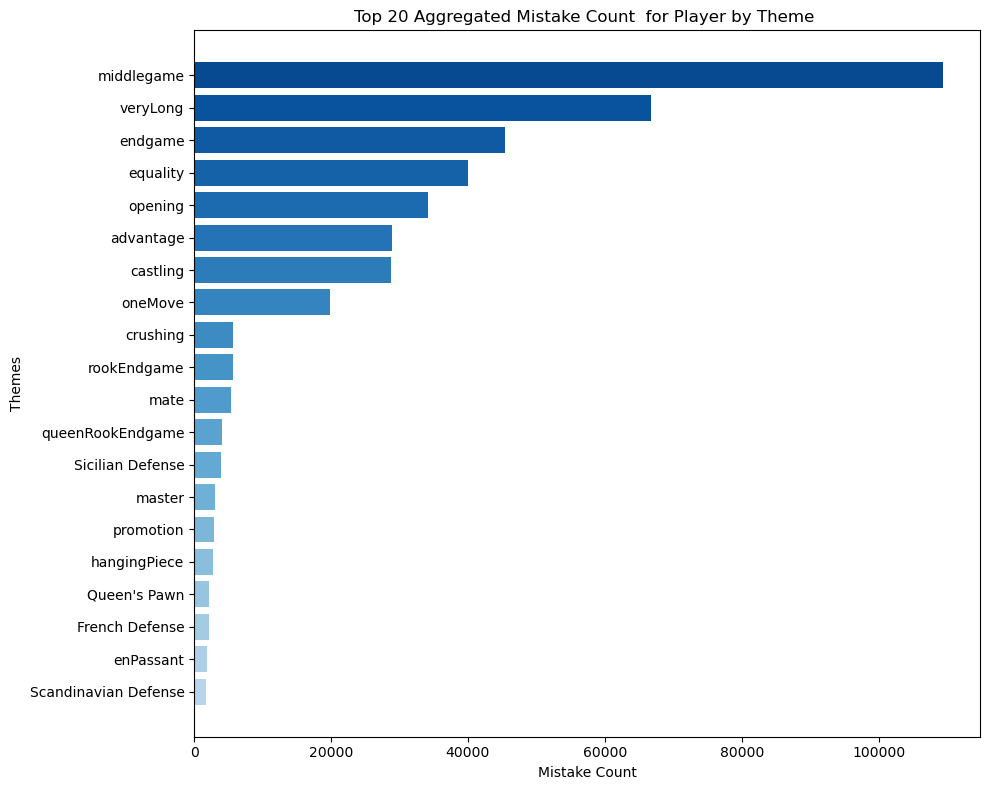

In [33]:
def aggregate_player_analysis_data(folder_path):
    aggregated_data = pd.DataFrame()
    
    # Iterate over all files
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            if aggregated_data.empty:
                aggregated_data = df
            else:
                aggregated_data = aggregated_data.merge(df, on='Themes', how='outer', suffixes=('', '_new'))
                aggregated_data['mistake_count'] = aggregated_data['mistake_count'].fillna(0) + aggregated_data['mistake_count_new'].fillna(0)
                aggregated_data.drop(columns=['mistake_count_new'], inplace=True)
    
    return aggregated_data

def plot_aggregated_data(aggregated_data):
    # Sort the data to get the top 20 themes by mistake count
    top_20_data = aggregated_data.sort_values(by='mistake_count', ascending=False).head(20)
    colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(top_20_data)))
    
    # Plot the top 20 aggregated data
    plt.figure(figsize=(10, 8))
    plt.barh(top_20_data['Themes'], top_20_data['mistake_count'], color=colors)
    plt.xlabel('Mistake Count')
    plt.ylabel('Themes')
    plt.title('Top 20 Aggregated Mistake Count  for Player by Theme ')
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


folder_path = 'player_analysis'
aggregated_data = aggregate_player_analysis_data(folder_path)

# Plot 
plot_aggregated_data(aggregated_data)


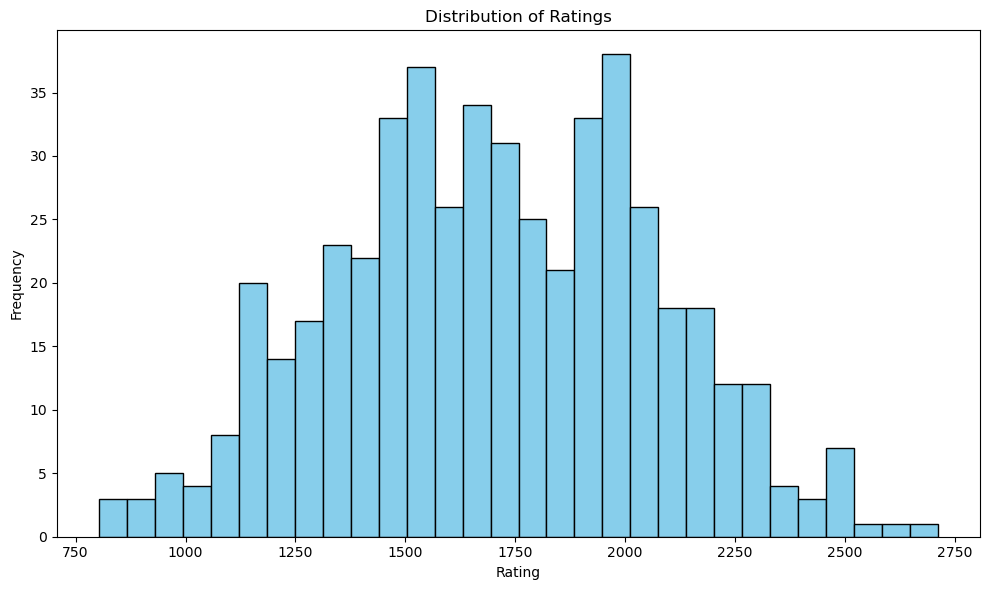

In [38]:
def extract_ratings(folder_path):
    ratings = []
    
    for filename in os.listdir(folder_path):
        match = re.search(r"-(\d+)\.csv$", filename)
        if match:
            rating = int(match.group(1))
            ratings.append(rating)
    
    return ratings

def plot_ratings(ratings):
    plt.figure(figsize=(10, 6))
    plt.hist(ratings, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratings')
    plt.tight_layout()
    plt.show()

def aggregate_plot(folder_path):
    ratings = extract_ratings(folder_path)
    plot_ratings(ratings)

# Plot
folder_path = 'player_analysis'
aggregate_plot(folder_path)


In [39]:
player = pd.read_csv("player_analysis\AmazingDiesel-894.csv")

baseline = [
    [ 587271,   47453,   41408,  213390,  769764,  838084,  488649,   10428,  701055,  232738,  392119,  598404,  755358,  198403,  217461,  501895, 1114006,   55841,  847702,  453604],
    [ 587271,   47453,   41408,  213390,  769764,  838084,  488649,   10428,  701055,  232738,  392119,  598404,  755358,  198403,  217461,  501895, 1114006,   55841,  847702,  453604],
    [ 788534, 1032927,  145405, 1030807,  795867,  127195,  480960,   89578,  219543, 1095138,  607974,  278978,  539435,  728118,   44454,  538359,  279426,  707403,  686447,  588904]
]


case_2 = [[ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,  208360,  131522,  983144,  683912,   97618,  445600,  559021,  994304,  951611,  374814,  905361,  378861,  370315],
    [ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,  784647,  304663, 1088285,  792146,  574340,  811234,  133900,  496122,  807490,  130547, 1069007,  160854,  336272],
    [ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,  679600,  574340,   26701,  133900,  874837,  496122,  807490,  130547, 1028255, 1069007,  708228,  160854,  994594]
]

case_3 = [[ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,  208360,  131522,  983144,  683912,   97618,  445600,  559021,  994304,  951611,  374814,  905361,  378861,  370315],
    [ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,  784647,  304663, 1088285,  792146,  574340,  811234,  133900,  496122,  807490,  130547, 1069007,  160854,  336272],
    [ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,  679600,  574340,   26701,  133900,  874837,  496122,  807490,  130547, 1028255, 1069007,  708228,  160854,  994594]
]

case_4 = [[ 174090,  723226,  780152,  525717, 1074208,  787713,  165325,  208360,  131522,  983144,  683912,   97618,  445600,  559021,  994304,  951611,  374814,  905361,  378861,  370315],
    [ 667266,  477476,  992055,  874837, 1028255,  804847,  375792,  784647,  304663, 1088285,  792146,  574340,  811234,  133900,  496122,  807490,  130547, 1069007,  160854,  336272],
    [ 804847,  375792,  304663, 1088285,  667266,  477476,  992055,  679600,  574340,   26701,  133900,  874837,  496122,  807490,  130547, 1028255, 1069007,  708228,  160854,  994594]
]

case_5 = [[ 920, 1118119,  462000,  118037,  755800,  219089, 1090194, 1104575,  395288,  145057,  675652,  881145,  256205,  778959,  949097,  687921,  142521,  241001,  115747,  163797],
    [ 667266,  477476,  992055,  874837, 1028255,  784647,  792146,  811234,  804847,  375792,  304663, 1088285,  679600,   26701,   66877,  708228,  994594,  574340,  969987,  133900],
    [ 804847,  375792,  667266, 1088285,  304663,  477476,  992055,  679600,   26701,  874837, 1028255,  708228,  994594,  574340,  969987,  133900,  496122,  972310,  784647,  204585]
]




Rating                                                    0.799282
Themes              intermezzo long mate mateIn3 opening sacrifice
OpeningTags                                      Four Knights Game
combined_text    intermezzo long mate mateIn3 opening sacrifice...
Name: 3125, dtype: object

In [18]:
df = pd.read_csv('data\lichess_db_puzzle.csv')

df_filtered = df[(df['NbPlays'] > 1000) & (df['Popularity'] >= 80)].copy()

df_filtered = df_filtered.drop(columns = ["FEN", "PuzzleId", "Moves", "GameUrl"])


# Baseline

In [19]:
#Cosine

df_filtered.iloc[587271]

Rating                                                          2836
RatingDeviation                                                  116
Popularity                                                        91
NbPlays                                                         1084
Themes             advantage doubleCheck kingsideAttack middlegam...
OpeningTags                                                      NaN
Name: 1962801, dtype: object

In [23]:
#Euclidean

df_filtered.iloc[10428]

Rating                                                          2749
RatingDeviation                                                  104
Popularity                                                        91
NbPlays                                                         1684
Themes             advantage attraction doubleCheck kingsideAttac...
OpeningTags                                                      NaN
Name: 35027, dtype: object

In [24]:
#Manhattan

df_filtered.iloc[607974]

Rating                                                          1682
RatingDeviation                                                   75
Popularity                                                        95
NbPlays                                                         2916
Themes                                                    middlegame
OpeningTags        Queens_Pawn_Game Queens_Pawn_Game_Levitsky_Attack
Name: 2032450, dtype: object

# CASE 2

In [26]:
#Cosine

df_filtered.iloc[787713]

Rating                                                          2536
RatingDeviation                                                   81
Popularity                                                        93
NbPlays                                                         5304
Themes             attraction discoveredAttack intermezzo kingsid...
OpeningTags        Queens_Gambit_Accepted Queens_Gambit_Accepted_...
Name: 2632652, dtype: object

In [27]:
#Euclidean

df_filtered.iloc[574340]

Rating                    984
RatingDeviation            83
Popularity                 95
NbPlays                  1266
Themes             middlegame
OpeningTags               NaN
Name: 1918918, dtype: object

In [28]:
#Manhattan

df_filtered.iloc[130547]

Rating                   1024
RatingDeviation            77
Popularity                 92
NbPlays                  1488
Themes             middlegame
OpeningTags               NaN
Name: 437401, dtype: object

# CASE 3

In [29]:
#Cosine

df_filtered.iloc[525717]

Rating                                                          2637
RatingDeviation                                                   89
Popularity                                                        93
NbPlays                                                         6119
Themes             attraction discoveredAttack intermezzo kingsid...
OpeningTags        French_Defense French_Defense_Kings_Indian_Attack
Name: 1756868, dtype: object

In [31]:
#Euclidean

df_filtered.iloc[811234]

Rating                                                       1281
RatingDeviation                                                75
Popularity                                                     96
NbPlays                                                      1703
Themes                                                    opening
OpeningTags        Indian_Defense Indian_Defense_Budapest_Defense
Name: 2711567, dtype: object

In [35]:
#Manhattan

df_filtered.iloc[708228]

Rating                 972
RatingDeviation         77
Popularity              98
NbPlays               1596
Themes             endgame
OpeningTags            NaN
Name: 2368143, dtype: object

# CASE 4

In [33]:
#Cosine

df_filtered.iloc[208360]

Rating                                                          2523
RatingDeviation                                                  104
Popularity                                                        90
NbPlays                                                         1054
Themes             attraction discoveredAttack intermezzo kingsid...
OpeningTags         French_Defense French_Defense_Tarrasch_Variation
Name: 697248, dtype: object

In [34]:
#Euclidean

df_filtered.iloc[133900]

Rating                                                          996
RatingDeviation                                                  81
Popularity                                                       94
NbPlays                                                        1060
Themes                                                   middlegame
OpeningTags        English_Defense English_Defense_Other_variations
Name: 448762, dtype: object

In [37]:
#Manhattan

df_filtered.iloc[26701]

Rating                 933
RatingDeviation         77
Popularity              99
NbPlays               1193
Themes             endgame
OpeningTags            NaN
Name: 89488, dtype: object

# CASE 5

In [36]:
#Cosine

df_filtered.iloc[920]

Rating                                                          2625
RatingDeviation                                                   85
Popularity                                                        94
NbPlays                                                         4068
Themes                intermezzo long mate mateIn3 opening sacrifice
OpeningTags        Four_Knights_Game Four_Knights_Game_Halloween_...
Name: 3125, dtype: object

In [38]:
#Euclidean

df_filtered.iloc[304663]

Rating                    822
RatingDeviation            75
Popularity                 97
NbPlays                  1121
Themes             middlegame
OpeningTags               NaN
Name: 1019194, dtype: object

In [39]:
#Manhattan

df_filtered.iloc[969987]

Rating                 986
RatingDeviation         88
Popularity              93
NbPlays               1358
Themes             endgame
OpeningTags            NaN
Name: 3243002, dtype: object